# prediction-targt

5761
mse: 1.3170534372329712; mae: 0.8031169772148132; std: 0.8198617100715637; scc: 0.7123251557350159; pcc: 0.850541353225708


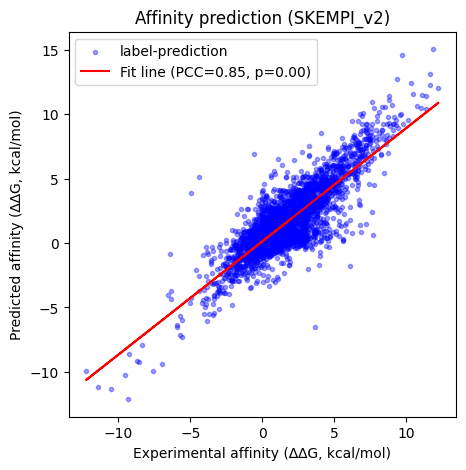

In [98]:
import numpy as np
import torch
import pickle
from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
import scipy.stats as stats

with open("./output/skempi_v2//011/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]
pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")

slope, intercept, r_value, p_value, std_err = stats.linregress(y.numpy(), pred.numpy())

plt.figure(figsize=(5, 5))
plt.scatter(y, pred, label='label-prediction', color='b', marker='.', alpha=0.37)

plt.plot(y.numpy(), slope * y.numpy() + intercept, color='r', label=f'Fit line (PCC={r_value:.2f}, p={p_value:.2f})')

plt.title('Affinity prediction (SKEMPI_v2)')
plt.xlabel('Experimental affinity (∆∆G, kcal/mol)')
plt.ylabel('Predicted affinity (∆∆G, kcal/mol)')
plt.legend()
plt.show()


5152
mse: 0.20135027170181274; mae: 0.3724701404571533; std: 0.2502566874027252; scc: 0.2848722040653229; pcc: 0.2680121064186096


Text(0, 0.5, 'predicted ΔΔG')

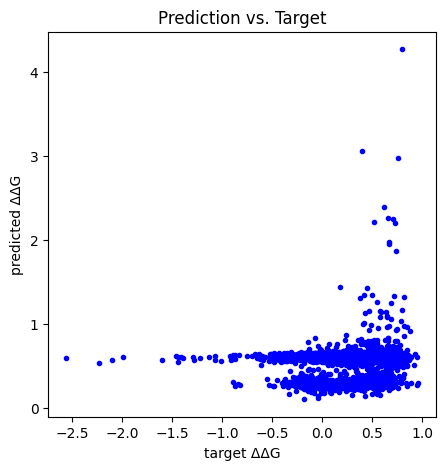

In [99]:
import numpy as np
import torch
import pickle

with open("./test/mavedb_bkp/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]

pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y, pred, label='y-pred', color='blue', marker='.')
# plt.xlim(-7.5, 12.5)
# plt.ylim(-7.5, 12.5)

plt.title('Prediction vs. Target')
plt.xlabel('target ΔΔG')
plt.ylabel('predicted ΔΔG')

In [103]:
import numpy as np
import torch
import pickle

with open("./test/mavedb_1ohz_myformula/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]

pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import plotly.express as px
import pandas as pd

df = pd.DataFrame(test_pred_y)

# df = df[df["name"].str.split("_", expand=True)[1].str[-3:-1] == '11']

# 使用Plotly创建散点图
fig = px.scatter(df, x='y', y='pred', hover_name='name', title='Prediction vs. Target',
                 labels={'y': 'target ΔΔG', 'pred': 'predicted ΔΔG'},
                 width=600, height=600)

# 显示图表
fig.show()



2609
mse: 0.023851031437516212; mae: 0.11049360036849976; std: 0.10791968554258347; scc: 0.03676936402916908; pcc: 0.18403075635433197


In [68]:
import torch

skempi = torch.load(f"./data/skempi_v2/dataset_processed_mutation_level.pt")
info_1ohz = skempi[skempi["wt_name"] == "1OHZ"].reset_index(drop=True)
torch.save(info_1ohz, "./data/skempi_v2/dataset_1ohz.pt")
info_1ohz

,wt_name,mut_name,ddg,daffinity,target,split
0,1OHZ,"1OHZ_SB11A,TB12A",0.090356,1.800000e-09,0.090356,1
1,1OHZ,"1OHZ_SB11A,TB12A,SB45A,TB46A",0.000000,0.000000e+00,0.000000,1
2,1OHZ,"1OHZ_SB11Q,SB45Q",2.477590,4.875000e-07,2.477590,5
3,1OHZ,"1OHZ_SB45A,TB46A",0.090356,1.800000e-09,0.090356,7
4,1OHZ,"1OHZ_SB11L,TB12L,SB45Q",3.408678,1.987500e-06,3.408678,9


In [69]:
info_1ohz["target"].mean()

1.213396064841121

In [104]:
import numpy as np
import torch
import pickle

with open("./test/skempi_1ohz/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]

pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import plotly.express as px
import pandas as pd

df = pd.DataFrame(test_pred_y)

# df = df[df["name"].str.split("_", expand=True)[1].str[-3:-1] == '11']

# 使用Plotly创建散点图
fig = px.scatter(df, x='y', y='pred', hover_name='name', title='Prediction vs. Target',
                 labels={'y': 'target ΔΔG', 'pred': 'predicted ΔΔG'},
                 width=600, height=600)

# 显示图表
fig.show()



5
mse: 0.41829195618629456; mae: 0.4277099668979645; std: 0.5423976182937622; scc: 0.9746789932250977; pcc: 0.9997923374176025


In [87]:
import numpy as np
import torch
import pickle

with open("./test/mavedb_2vn5/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]

pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import plotly.express as px
import pandas as pd

df = pd.DataFrame(test_pred_y)

# 使用Plotly创建散点图
fig = px.scatter(df, x='y', y='pred', hover_name='name', title='Prediction vs. Target',
                 labels={'y': 'target ΔΔG', 'pred': 'predicted ΔΔG'},
                 width=600, height=600)

# 显示图表
fig.show()



2543
mse: 0.3072023391723633; mae: 0.45963865518569946; std: 0.3097940683364868; scc: 0.11917281150817871; pcc: 0.144968643784523


In [88]:
def str2int(s):
    num = ""
    for i in s:
        if i.isdigit():
            num += i
    return int(num)

str2int("QA11R")

11

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


# 解析name列，提取蛋白质序号、突变位点和目标氨基酸
df['pdb_id'] = df['name'].str.split('_').str[0]
df['mutation'] = df['name'].str.split('_').str[1]
df['original_aa'] = df['mutation'].str[0]
df['position'] = df['mutation'].apply(str2int)
df['new_aa'] = df['mutation'].str[-1]
df


,name,pred,y,pdb_id,mutation,original_aa,position,new_aa
0,2VN5_PA152N,0.578133,0.122006,2VN5,PA152N,P,152,N
1,2VN5_PA152T,0.574897,-0.470997,2VN5,PA152T,P,152,T
2,2VN5_PA152S,0.585347,0.003096,2VN5,PA152S,P,152,S
3,2VN5_PA152G,0.593120,-1.224410,2VN5,PA152G,P,152,G
4,2VN5_PA152A,0.586131,-0.403031,2VN5,PA152A,P,152,A
...,...,...,...,...,...,...,...,...
2538,2VN5_GA25E,0.631910,-0.033349,2VN5,GA25E,G,25,E
2539,2VN5_PA152R,0.572379,-0.913921,2VN5,PA152R,P,152,R
2540,2VN5_PA152H,0.584550,-0.284848,2VN5,PA152H,P,152,H
2541,2VN5_PA152D,0.646197,0.340043,2VN5,PA152D,P,152,D


In [90]:

# 生成20种氨基酸的列表
amino_acids = list("AVLIMFYWRHKDESTNQGCP")

# 创建一个空的DataFrame，行是序列位置，列是20种氨基酸
positions = np.sort(df['position'].unique())


In [91]:

heatmap_data_y = pd.DataFrame(index=positions, columns=amino_acids)
heatmap_data_pred = pd.DataFrame(index=positions, columns=amino_acids)


# 填充heatmap_data
for _, row in df.iterrows():
    heatmap_data_y.at[row['position'], row['new_aa']] = row['y']
    heatmap_data_pred.at[row['position'], row['new_aa']] = row['pred']

# 将数据转换为数值类型
heatmap_data_y = heatmap_data_y.astype(float)
heatmap_data_pred = heatmap_data_pred.astype(float)
heatmap_data_y

,A,V,L,I,M,F,Y,W,R,H,K,D,E,S,T,N,Q,G,C,P
11,0.009273,-0.035434,0.037905,-0.053300,-0.191230,-0.058613,-0.048449,0.037845,-0.001054,-0.100757,0.022115,NaN,0.061134,-0.070710,-0.020384,-0.185240,-0.028302,-0.073554,0.041302,-0.001302
12,-0.019945,-0.021952,-0.032843,-0.032528,0.102724,0.047050,-0.235958,0.161069,-0.035624,-0.067484,0.102724,-0.034612,-0.110721,NaN,-0.064007,-0.189904,0.106536,-0.052980,-0.219705,-0.020322
13,-0.027043,-0.274662,NaN,0.051274,NaN,0.198203,NaN,NaN,0.083670,0.022115,0.019725,0.279734,NaN,0.157241,0.044148,0.102724,0.039240,0.354790,0.008101,0.135686
14,-0.084068,0.059454,0.059814,0.096432,0.019725,NaN,-0.291883,NaN,-0.005898,-0.168307,NaN,-0.510593,-0.225626,-0.062464,-0.008698,0.043845,-0.074590,NaN,-0.384492,-0.011815
15,-0.033917,NaN,0.122936,0.179205,0.124157,0.632004,0.284015,NaN,0.229371,0.178356,0.217322,-0.117421,0.127060,0.094134,0.054887,0.115249,0.254601,0.056631,-0.283133,0.097433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.117523,NaN,0.138169,0.275825,0.177392,0.370192,0.250268,0.510644,0.784000,0.858546,0.821869,0.595821,0.316247,0.165518,0.183391,0.205713,0.358372,0.063292,0.075413,0.661372
149,-0.279262,-0.891204,-0.368139,-0.254954,-0.909002,-0.339250,-0.435004,NaN,-0.300087,-0.453330,-0.221557,-0.632546,NaN,-0.357987,NaN,-0.238048,-0.177752,-0.502614,-0.516728,-0.346900
150,-0.173539,-0.275403,-0.272811,NaN,-0.092031,-0.381670,-0.225197,0.135224,-0.236102,-0.602978,0.100080,-0.229635,-0.130975,-0.208502,-0.310928,-0.280154,-0.344084,-0.316420,-0.477704,-0.468828
151,-0.431222,-0.371807,-0.319942,-0.421445,-0.479627,-0.369015,-0.431558,-0.528280,-0.534607,-0.354202,-0.265876,NaN,-0.579116,-0.408040,-0.383766,-0.360834,-0.314969,-0.318333,-0.343616,-0.332730


In [92]:
# 将数据转为长格式，以便plotly绘图
heatmap_data_long_y = heatmap_data_y.reset_index().melt(id_vars='index', var_name='amino_acid', value_name='value')
heatmap_data_long_y = heatmap_data_long_y.rename(columns={'index': 'position'})
heatmap_data_long_y

heatmap_data_long_pred = heatmap_data_pred.reset_index().melt(id_vars='index', var_name='amino_acid', value_name='value')
heatmap_data_long_pred = heatmap_data_long_pred.rename(columns={'index': 'position'})
heatmap_data_long_pred

,position,amino_acid,value
0,11,A,0.569483
1,12,A,0.583887
2,13,A,0.609693
3,14,A,0.639499
4,15,A,0.610667
...,...,...,...
2835,148,P,0.616109
2836,149,P,0.618830
2837,150,P,0.603991
2838,151,P,0.571925


In [ ]:

# 创建热图
fig = px.imshow(
    heatmap_data_y.transpose(), 
    labels={'x': 'Amino Acid', 'y': 'Protein Position', 'color': 'y'},
    x=positions,
    y=amino_acids,
    aspect="auto",  # 保持正方形
    color_continuous_scale='RdBu'
)

# 设置每个数据点为正方形
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# 设置布局
fig.update_layout(
    title='Heatmap of Protein Mutations',
    xaxis_title='Amino Acid',
    yaxis_title='Protein Position',

)

# 显示图表
fig.show()

In [78]:

# 创建热图
fig = px.imshow(
    heatmap_data_y.transpose(), 
    labels={'x': 'Amino Acid', 'y': 'Protein Position', 'color': 'y'},
    x=positions,
    y=amino_acids,
    aspect="auto",  # 保持正方形
    color_continuous_scale='RdBu'
)

# 设置每个数据点为正方形
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# 设置布局
fig.update_layout(
    title='Heatmap of Protein Mutations',
    xaxis_title='Amino Acid',
    yaxis_title='Protein Position',

)

# 显示图表
fig.show()

In [86]:

# 创建热图
fig = px.imshow(
    heatmap_data_pred.transpose(), 
    labels={'x': 'Amino Acid', 'y': 'Protein Position', 'color': 'y'},
    x=positions,
    y=amino_acids,
    aspect="auto",  # 保持正方形
    color_continuous_scale='RdBu'
)

# 设置每个数据点为正方形
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# 设置布局
fig.update_layout(
    title='Heatmap of Protein Mutations',
    xaxis_title='Amino Acid',
    yaxis_title='Protein Position',

)

# 显示图表
fig.show()

In [70]:
import torch

skempi = torch.load(f"./data/skempi_v2/dataset_processed_mutation_level.pt")
info_2vn5 = skempi[skempi["wt_name"] == "2VN5"].reset_index(drop=True)
torch.save(info_2vn5, "./data/skempi_v2/dataset_2vn5.pt")
info_2vn5

,wt_name,mut_name,ddg,daffinity,target,split
0,2VN5,"2VN5_SB42A,TB43F,TA35A,NA37A,YA39A,NA81A",5.212734,4.999000e-06,5.212734,0
1,2VN5,"2VN5_SB42A,TB43F,SA66A",-0.090886,-1.380000e-10,-0.090886,0
2,2VN5,"2VN5_SB42A,TB43F,MA125G",1.597428,1.260000e-08,1.597428,0
3,2VN5,"2VN5_SB42A,TB43F,TA35A,NA37A,NA81A",3.160977,1.740000e-07,3.160977,2
4,2VN5,"2VN5_SB42A,TB43F,IA83A",0.949746,3.720000e-09,0.949746,2
5,2VN5,"2VN5_SB42A,TB43F,YA39A",1.297409,7.330000e-09,1.297409,2
6,2VN5,"2VN5_SB42A,TB43F,NA37A",1.225782,6.410000e-09,1.225782,2
7,2VN5,"2VN5_SB42A,TB43F,LA79A",2.940180,1.210000e-07,2.940180,2
8,2VN5,"2VN5_SB42A,TB43F,AB14S,LB15T",0.359740,8.000000e-10,0.359740,3
9,2VN5,"2VN5_SB42Q,TB43Q",0.970148,3.880000e-09,0.970148,3


In [71]:
info_2vn5["target"].mean()

1.7973366392133887

In [96]:
import numpy as np
import torch
import pickle

with open("./test/skempi_2vn5/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]

pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import plotly.express as px
import pandas as pd

df = pd.DataFrame(test_pred_y)

# 使用Plotly创建散点图
fig = px.scatter(df, x='y', y='pred', hover_name='name', title='Prediction vs. Target',
                 labels={'y': 'target ΔΔG', 'pred': 'predicted ΔΔG'},
                 width=500, height=500)

# 显示图表
fig.show()



24
mse: 0.35636642575263977; mae: 0.4870282709598541; std: 0.35263460874557495; scc: 0.9147824645042419; pcc: 0.9476334452629089


4157
mse: 283.5020446777344; mae: 7.415057182312012; std: 15.118661880493164; scc: 0.025388481095433235; pcc: 0.014364289119839668


Text(0, 0.5, 'Predicted affinity (∆∆G, kcal/mol)')

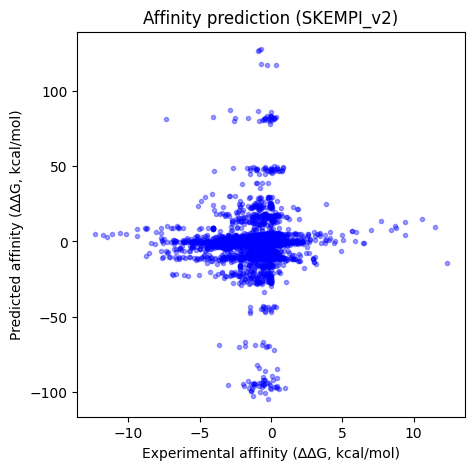

In [31]:
import numpy as np
import torch
import pickle

with open("./output/s4169/s4169_structure_001/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]
pred = torch.hstack(test_pred_y["pred"]).tolist()
y = torch.hstack(test_pred_y["y"]).tolist()
pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y, pred, label='y-pred', color='b', marker='.', alpha=0.37)
# plt.xlim(-7.5, 12.5)
# plt.ylim(-7.5, 12.5)

plt.title('Affinity prediction (SKEMPI_v2)')
plt.xlabel('Experimental affinity (∆∆G, kcal/mol)')
plt.ylabel('Predicted affinity (∆∆G, kcal/mol)')

171
mse: 112.20466613769531; mae: 8.195049285888672; std: 6.731330394744873; scc: -0.5967170000076294; pcc: -0.6138756275177002


Text(0, 0.5, 'Predicted affinity (∆∆G, kcal/mol)')

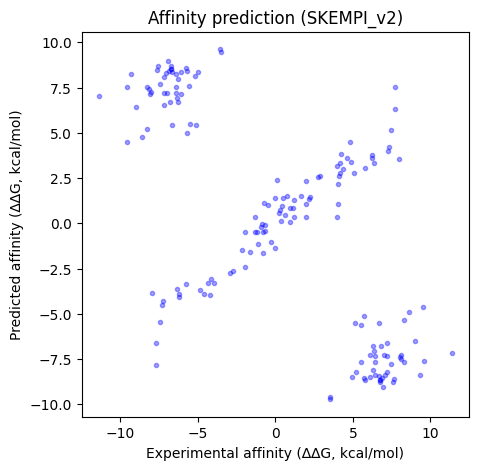

In [46]:
import numpy as np
import torch
import pickle

with open("./output/m1707/m1707_structure_001/pred_target/test_pred_target_fold_2.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["target"]
pred = torch.hstack(test_pred_y["pred"]).tolist()
y = torch.hstack(test_pred_y["target"]).tolist()
pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y, pred, label='y-pred', color='b', marker='.', alpha=0.37)
# plt.xlim(-7.5, 12.5)
# plt.ylim(-7.5, 12.5)

plt.title('Affinity prediction (SKEMPI_v2)')
plt.xlabel('Experimental affinity (∆∆G, kcal/mol)')
plt.ylabel('Predicted affinity (∆∆G, kcal/mol)')

In [11]:
import numpy as np
import torch
import pickle

with open("./predict/mutSpike_ACE2_wt/test_pred_y.pkl", "rb") as pred_y_file:
    test_pred_y = pickle.load(pred_y_file)

pred = test_pred_y["pred"]
y = test_pred_y["y"]

pred = torch.tensor(pred)
y = torch.tensor(y)
print(len(pred))

from torchmetrics.functional import mean_squared_error, mean_absolute_error, spearman_corrcoef, pearson_corrcoef
mse = mean_squared_error(pred, y)
mae = mean_absolute_error(pred, y)
abs_err_std = torch.std(torch.abs(pred - y))
spearman_cc = spearman_corrcoef(pred, y)
pearson_cc = pearson_corrcoef(pred, y)
print(f"mse: {mse}; mae: {mae}; std: {abs_err_std}; scc: {spearman_cc}; pcc: {pearson_cc}")


import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(y, pred, label='y-pred', color='blue', marker='.')
# plt.xlim(-7.5, 12.5)
# plt.ylim(-7.5, 12.5)

plt.title('Prediction vs. Target')
plt.xlabel('target ΔΔG')
plt.ylabel('predicted ΔΔG')

FileNotFoundError: [Errno 2] No such file or directory: './predict/mutSpike_ACE2_wt/test_pred_y.pkl'

# data distribution

In [4]:
import pandas as pd
import torch


df = torch.load("./data/skempi_v2/dataset_processed_mutation_level.pt")
df

,wt_name,mut_name,ddg,daffinity,target,split
0,1DAN,"1DAN_TT55A,FU50A",4.496988,3.847400e-09,4.496988,0
1,3F1S,3F1S_DA36A,2.184384,8.190000e-08,2.184384,0
2,1R0R,"1R0R_EI5D,AI10V,TI12S,RI16M,NI23S,GI27N,NI31D,...",0.478587,3.730000e-11,0.478587,0
3,2B2X,"2B2X_VH50T,EH64K,QL28S,YL52N,SL91R",3.770126,8.485400e-07,3.770126,0
4,3KBH,3KBH_DA20A,0.872968,2.290000e-07,0.872968,0
...,...,...,...,...,...,...
5748,3BT1,3BT1_VU222A,-0.484935,-2.600000e-10,-0.484935,9
5749,4RS1,"4RS1_EA25K,DA28K",4.120828,1.998100e-06,4.120828,9
5750,4NKQ,"4NKQ_DC99K,RB80D",0.176364,1.700000e-10,0.176364,9
5751,1K8R,1K8R_RA41A,1.226585,1.891000e-06,1.226585,9


In [10]:
pdb_set = set(df["wt_name"])
pdb_ddg = {}
for pdb in pdb_set:
    pdb_ddg[pdb] = list(df[df["wt_name"] == pdb]["ddg"])
print(len(pdb_ddg))

sample = {}
for pdb in pdb_ddg:
    # print(len(pdb_ddg[pdb]))
    if len(pdb_ddg[pdb]) > 70:
        print(f"{pdb}: {len(pdb_ddg[pdb])}")
        sample[pdb] = pdb_ddg[pdb]
len(sample)

340
1R0R: 262
1A22: 175
3BT1: 240
1AO7: 141
4G0N: 71
3HFM: 87
1CHO: 271
1BRS: 75
3SGB: 273
1PPF: 243
1JTG: 194
1DAN: 118
3S9D: 142


13

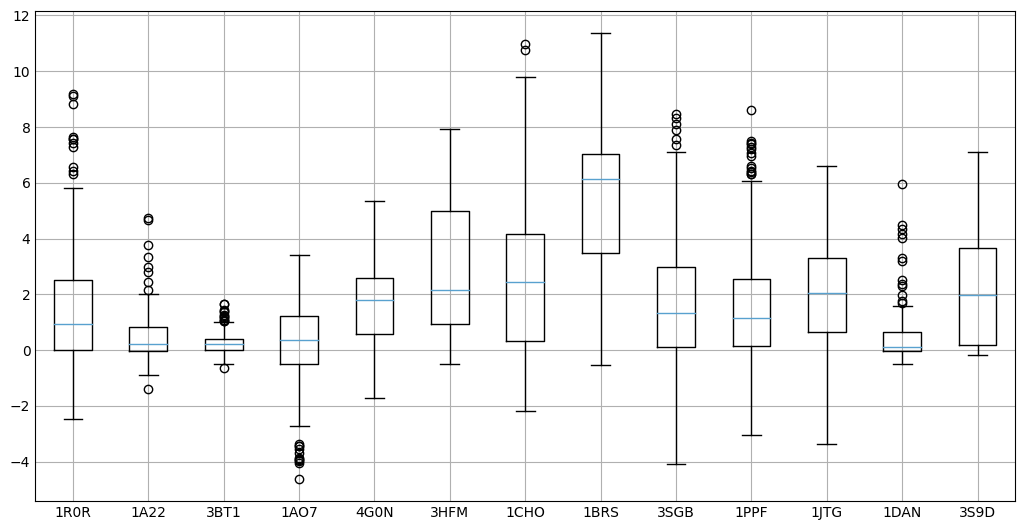

In [12]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

# 绘制箱线图
plt.figure(figsize=(10, 5))
plt.boxplot(sample.values(), labels=sample.keys())
# plt.xlabel('Groups')
# plt.ylabel('Values')
# plt.title('Boxplot of Groups')

plt.show()


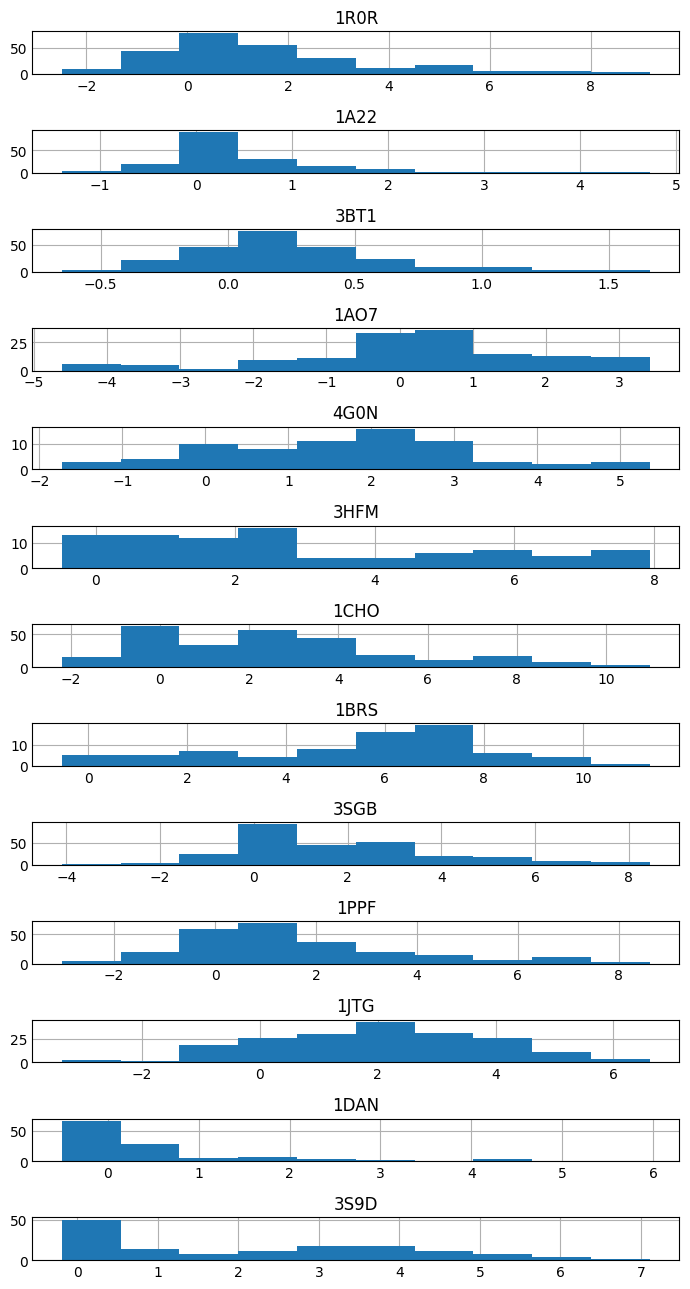

In [13]:
import matplotlib.pyplot as plt


# 设置子图布局
fig, axs = plt.subplots(len(sample), 1, figsize=(7, 1*len(sample)))

# 绘制子图
for i, (group, values) in enumerate(sample.items()):
    axs[i].hist(values, bins=10)
    axs[i].set_title(group)
plt.tight_layout()
plt.show()


# model

In [15]:
from model import *

model = get_model()


In [16]:

pretrain = torch.load("./models/GPSite.ckpt")
print(pretrain.keys())

model_state = model.state_dict()
print(model_state.keys())

odict_keys(['Graph_encoder.node_embedding.weight', 'Graph_encoder.node_embedding.bias', 'Graph_encoder.edge_embedding.weight', 'Graph_encoder.edge_embedding.bias', 'Graph_encoder.norm_nodes.weight', 'Graph_encoder.norm_nodes.bias', 'Graph_encoder.norm_nodes.running_mean', 'Graph_encoder.norm_nodes.running_var', 'Graph_encoder.norm_nodes.num_batches_tracked', 'Graph_encoder.norm_edges.weight', 'Graph_encoder.norm_edges.bias', 'Graph_encoder.norm_edges.running_mean', 'Graph_encoder.norm_edges.running_var', 'Graph_encoder.norm_edges.num_batches_tracked', 'Graph_encoder.W_v.weight', 'Graph_encoder.W_v.bias', 'Graph_encoder.W_e.weight', 'Graph_encoder.W_e.bias', 'Graph_encoder.layers.0.norm.0.weight', 'Graph_encoder.layers.0.norm.0.bias', 'Graph_encoder.layers.0.norm.1.weight', 'Graph_encoder.layers.0.norm.1.bias', 'Graph_encoder.layers.0.attention.lin_key.weight', 'Graph_encoder.layers.0.attention.lin_key.bias', 'Graph_encoder.layers.0.attention.lin_query.weight', 'Graph_encoder.layers.0.a

In [17]:
layer = 'Graph_encoder.layers.1.attention.lin_key.weight'
pretrain_parameter = pretrain[layer].cpu()
print(pretrain_parameter)

model_parameter = model_state[layer].cpu()
print(model_parameter)

tensor([[ 0.0235,  0.0144, -0.0197,  ...,  0.0141, -0.0115, -0.0311],
        [-0.0148,  0.0583,  0.0029,  ...,  0.0242,  0.0707, -0.0383],
        [ 0.0182, -0.0321, -0.0096,  ...,  0.0026, -0.0534,  0.0287],
        ...,
        [-0.0390, -0.0104,  0.0348,  ..., -0.0287,  0.0003, -0.0009],
        [ 0.0257,  0.0086, -0.0511,  ...,  0.0400, -0.0104, -0.0238],
        [ 0.0254, -0.0193,  0.0175,  ..., -0.0134,  0.0154,  0.0052]])
tensor([[ 0.0361, -0.0700, -0.0356,  ..., -0.0280, -0.0994, -0.0673],
        [ 0.0326,  0.1409, -0.1055,  ...,  0.0095, -0.1264,  0.1376],
        [-0.0624, -0.0519, -0.0180,  ...,  0.0112,  0.0305, -0.0566],
        ...,
        [ 0.1323, -0.0737,  0.0183,  ..., -0.0015, -0.0160,  0.1013],
        [ 0.0207, -0.0719,  0.0668,  ..., -0.1093,  0.0654, -0.0273],
        [-0.1497,  0.0537,  0.0788,  ..., -0.0342, -0.0466,  0.0239]])


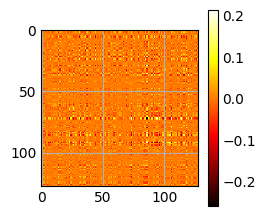

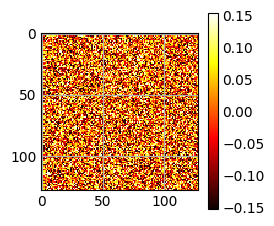

In [18]:

import matplotlib.pyplot as plt

# 使用 Matplotlib 绘制热图
plt.imshow(pretrain_parameter, cmap='hot', interpolation='nearest')
plt.colorbar()  # 添加颜色条
plt.show()

plt.imshow(model_parameter, cmap='hot', interpolation='nearest')
plt.colorbar()  # 添加颜色条
plt.show()


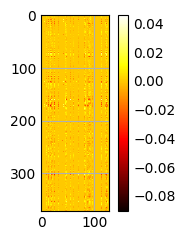

In [19]:
import torch

d_embedding = torch.load("./output/skempi_v2/011/d_embedding/1A22_A_B_FA10A.pt")

import matplotlib.pyplot as plt

plt.imshow(d_embedding, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()